In [1]:
!pip install tensorflow



In [3]:
pip install scikeras


Note: you may need to restart the kernel to use updated packages.


In [5]:
from scikeras.wrappers import KerasRegressor


In [23]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

In [9]:
# Load the dataset
df = pd.read_csv('level2_imagedataset.csv')


In [11]:
# Extract features and labels (assuming 'vomitoxin_ppb' is the target)
X = df.iloc[:, 1:-1].values
y = df['vomitoxin_ppb_normalized'].values


In [13]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Reshape data for CNN input (assuming 1D spectral data)
X_train = X_train[..., np.newaxis]  # Add channel dimension
X_test = X_test[..., np.newaxis]


In [17]:
# Define the CNN model
def create_model(filters=32, kernel_size=3, dense_units=128):
    model = keras.models.Sequential([
        layers.Conv1D(filters, kernel_size=kernel_size, activation='relu', input_shape=(X_train.shape[1], 1)),
        layers.MaxPooling1D(2),
        layers.Conv1D(filters*2, kernel_size=kernel_size, activation='relu'),
        layers.MaxPooling1D(2),
        layers.Flatten(),
        layers.Dense(dense_units, activation='relu'),
        layers.Dense(1)  # Regression output
    ])
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
    return model

In [21]:
# Show the model architecture
model = create_model()
model.summary()



C:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 451, 32)        │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 225, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 223, 64)        │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 111, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 7104)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       909,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 915,905 (3.49 MB)

 Trainable params: 915,905 (3.49 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
# Hyperparameter tuning using GridSearchCV
model = KerasRegressor(model=create_model, epochs=30, batch_size=32, verbose=0)

param_grid = {
    'model__filters': [32, 64],
    'model__kernel_size': [3, 5],
    'model__dense_units': [64, 128],
    'epochs': [20, 30, 50]
}

grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_result = grid.fit(X_train, y_train)


C:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_reg

C:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_reg

In [29]:
# Best model evaluation
best_model = grid_result.best_estimator_
print(f"Best Hyperparameters: {grid_result.best_params_}")



Best Hyperparameters: {'epochs': 50, 'model__dense_units': 128, 'model__filters': 64, 'model__kernel_size': 3}


MODEL EVALUATION


In [33]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [35]:
# Evaluate on test data
y_pred = best_model.predict(X_test)
print(f"Test MSE: {mean_squared_error(y_test, y_pred)}")
print(f"Test MAE: {mean_absolute_error(y_test, y_pred)}")
print(f"Test R² Score: {r2_score(y_test, y_pred)}")


Test MSE: 0.0002231558279196759
Test MAE: 0.009256257185824446
Test R² Score: 0.9863000947478822


VISUALISATION

In [39]:
import matplotlib.pyplot as plt

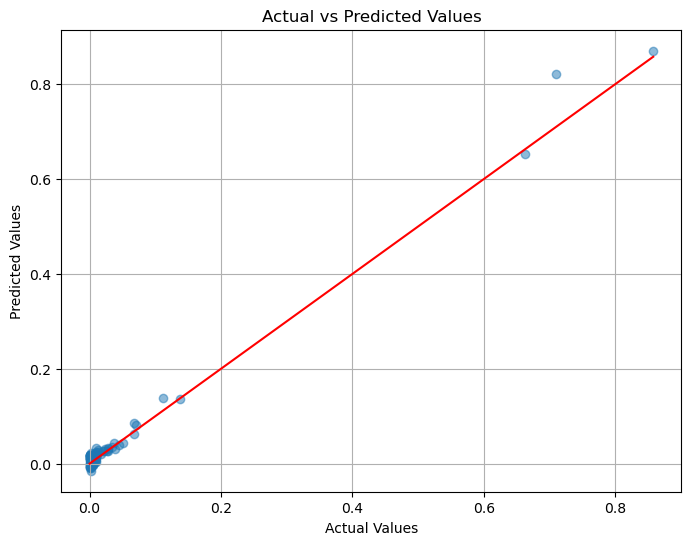

In [41]:
# Scatter plot of actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.grid(True)
plt.show()
